<a href="https://colab.research.google.com/github/AluizioW/Atividade3_IA/blob/main/ia_atividade3_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação - BreastCancer Dataset


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

### Coleta e Preparação dos Dados

In [ ]:
def avaliar_classificacao(y_test, y_preds, y_probs, modelo_nome):
    print(f"\n{modelo_nome} - Avaliação:")
    print("Acurácia:", accuracy_score(y_test, y_preds))
    print("Precisão:", precision_score(y_test, y_preds))
    print("Recall:", recall_score(y_test, y_preds))
    print("F1-score:", f1_score(y_test, y_preds))
    print("AUC-ROC:", roc_auc_score(y_test, y_probs))

    # Matriz de Confusão
    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_test, y_preds))

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.plot(fpr, tpr, label=f"{modelo_nome} (AUC = {roc_auc_score(y_test, y_probs):.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("Falso Positivo (FPR)")
    plt.ylabel("Verdadeiro Positivo (TPR)")
    plt.title("Curva ROC")
    plt.legend()
    plt.show()

### Pré-processamento dos Dados

In [ ]:
data = load_breast_cancer()
X, y = data.data, data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Regressão Logística

### Treinamento e Avaliação do Modelo

In [ ]:
log_model = LogisticRegression(max_iter=1000) # pode alterar o max_iter
log_model.fit(X_train_scaled, y_train)
log_preds = log_model.predict(X_test_scaled)
log_probs = log_model.predict_proba(X_test_scaled)[:, 1]


Regressão Logística - Avaliação:
Acurácia: 0.9824561403508771
Precisão: 0.9861111111111112
Recall: 0.9861111111111112
F1-score: 0.9861111111111112
AUC-ROC: 0.9953703703703703

Matriz de Confusão:
[[41  1]
 [ 1 71]]


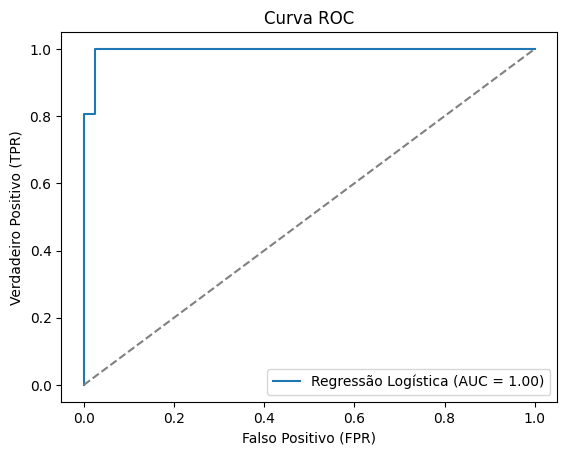

In [ ]:
avaliar_classificacao(y_test, log_preds, log_probs, "Regressão Logística")

## KNN

### Treinamento e Avaliaçõ do Modelo

In [ ]:
# metric='euclidean' or metric='minkowski'
# weights='uniform' or weights='distance'
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', weights='uniform') # pode alterar os 3
knn_model.fit(X_train_scaled, y_train)
knn_preds = knn_model.predict(X_test_scaled)
knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]


KNN Classifier - Avaliação:
Acurácia: 0.956140350877193
Precisão: 0.958904109589041
Recall: 0.9722222222222222
F1-score: 0.9655172413793104
AUC-ROC: 0.9788359788359788

Matriz de Confusão:
[[39  3]
 [ 2 70]]


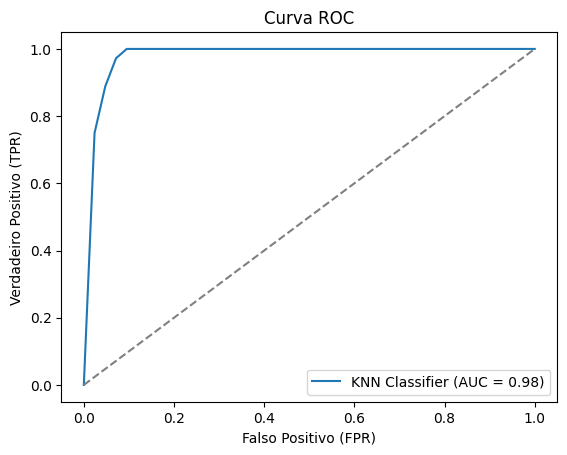

In [ ]:
avaliar_classificacao(y_test, knn_preds, knn_probs, "KNN Classifier")

# Regressão - Califórnia Housing Dataset


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

### Coleta e Preparação dos Dados

In [ ]:
data = fetch_california_housing()
X, y = data.data, data.target

In [ ]:
def avaliar_regressao(y_test, y_preds, modelo_nome):
    print(f"\n{modelo_nome} - Avaliação:")
    print("Erro Médio Absoluto (MAE):", mean_absolute_error(y_test, y_preds))
    print("Erro Quadrático Médio (MSE):", mean_squared_error(y_test, y_preds))
    print("Raiz do Erro Quadrático Médio (RMSE):", np.sqrt(mean_squared_error(y_test, y_preds)))
    print("Coeficiente de Determinação (R²):", r2_score(y_test, y_preds))


### Pré-processamento dos Dados

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Regressão Linear

### Treinamento e Avaliação do Modelo

In [ ]:
lr_model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=1) # pode alterar o fit
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)

In [ ]:
avaliar_regressao(y_test, lr_preds, "Regressão Linear")


Regressão Linear - Avaliação:
Erro Médio Absoluto (MAE): 0.5332001304956566
Erro Quadrático Médio (MSE): 0.5558915986952442
Raiz do Erro Quadrático Médio (RMSE): 0.7455813830127763
Coeficiente de Determinação (R²): 0.575787706032451


## KNN

### Treinamento e Avaliação do Modelo

In [ ]:
# metric='euclidean' or metric='minkowski'
# weights='uniform' or weights='distance'
knn_regressor_model = KNeighborsRegressor(n_neighbors=5, metric='minkowski', weights='uniform') # pode alterar os 3
knn_regressor_model.fit(X_train_scaled, y_train)
knn_regressor_preds = knn_regressor_model.predict(X_test_scaled)

In [ ]:
avaliar_regressao(y_test, knn_regressor_preds, "KNN Regressor")


KNN Regressor - Avaliação:
Erro Médio Absoluto (MAE): 0.4412041898910173
Erro Quadrático Médio (MSE): 0.4236678896368499
Raiz do Erro Quadrático Médio (RMSE): 0.650897756669087
Coeficiente de Determinação (R²): 0.6766903335738861
